In [1]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import pickle

import warnings
warnings.filterwarnings('ignore')


rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
# 경쟁사이용
competitor = pd.read_csv('../../data/경쟁사이용.txt', encoding='cp949')
display(competitor)
# 고객DEMO
pp_demo = pd.read_pickle("../../DATA_preprocessed/pp_demo.pickle")
display(pp_demo)
# 멤버심 여부
member = pd.read_csv('../../data/멤버십여부.txt', encoding='cp949')
display(member)
# 채널이용
channel = pd.read_csv('../../data/채널이용.txt', encoding='cp949')
display(channel)

# 상금 거래 관련
pp_purprd_prodcl = pd.read_pickle('../../DATA_preprocessed/pp_purprd_prodcl.pickle')
pp_purprd_prodcl

,고객번호,제휴사,경쟁사,이용년월
0,2,D,D02,201507
1,51,D,D01,201504
2,77,D,D02,201503
3,77,D,D02,201506
4,77,D,D02,201507
...,...,...,...,...
28154,19375,B,B01,201501
28155,19375,B,B01,201507
28156,19375,C,C03,201511
28157,19376,B,B01,201506


,고객번호,성별,연령대,거주지역
0,1,M,60세이상,서울특별시 강남구
1,2,M,60세이상,경기도
2,3,M,60세이상,서울특별시 은평구
3,4,F,60세이상,서울특별시 노원구
4,5,M,60세이상,경기도
...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구
19379,19380,F,20세~24세,서울특별시 마포구
19380,19381,F,40세~44세,부산광역시
19381,19382,F,45세~49세,부산광역시


,고객번호,멤버십명,가입년월
0,11,하이마트,201512
1,21,하이마트,201506
2,37,하이마트,201306
3,43,하이마트,201403
4,44,하이마트,201411
...,...,...,...
7451,19377,롭스,201411
7452,19379,롭스,201412
7453,19380,롭스,201412
7454,19381,다둥이,201506


,고객번호,제휴사,이용횟수
0,7,A_MOBILE/APP,4
1,14,A_MOBILE/APP,1
2,42,B_MOBILE/APP,23
3,74,A_MOBILE/APP,1
4,74,B_MOBILE/APP,30
...,...,...,...
8819,19168,C_ONLINEMALL,18
8820,19291,C_ONLINEMALL,1
8821,19312,B_ONLINEMALL,137
8822,19351,C_ONLINEMALL,19


,고객번호,제휴사,영수증번호,점포코드,구매_연,구매_월,구매_일,구매시간,소분류코드,구매금액,대분류명,대중분류명,중분류명,제휴사_중분류명,소분류명,TYPE,lev
0,1,A,1182697,12,2014,1,8,14,A010302,4800,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
1,1,A,1239229,12,2014,1,18,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
2,1,A,1307657,12,2014,1,30,11,A010302,3900,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
3,1,A,1402358,12,2014,2,18,16,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
4,1,A,1456379,12,2014,2,28,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28437049,18697,C,631324,29,2014,5,30,21,C060405,2300,식품,즉석식품,베이커리,C베이커리,페스츄리류,편의품,중가
28437050,18697,C,631629,29,2014,7,20,15,C060405,2300,식품,즉석식품,베이커리,C베이커리,페스츄리류,편의품,중가
28437051,18710,C,1073027,75,2015,1,22,12,C030312,7990,식품,채소류,근채류,C근채류,기타한방약재,편의품,고가
28437052,18710,C,1073138,75,2015,1,29,21,C030312,7990,식품,채소류,근채류,C근채류,기타한방약재,편의품,고가


In [2]:
pp_purprd_prodcl.head()

,고객번호,제휴사,영수증번호,점포코드,구매_연,구매_월,구매_일,구매시간,소분류코드,구매금액,대분류명,대중분류명,중분류명,제휴사_중분류명,소분류명,TYPE,lev
0,1,A,1182697,12,2014,1,8,14,A010302,4800,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
1,1,A,1239229,12,2014,1,18,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
2,1,A,1307657,12,2014,1,30,11,A010302,3900,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
3,1,A,1402358,12,2014,2,18,16,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
4,1,A,1456379,12,2014,2,28,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가


In [5]:
pp_purprd_prodcl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28437054 entries, 0 to 28437053
Data columns (total 17 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   고객번호      int64 
 1   제휴사       object
 2   영수증번호     int64 
 3   점포코드      int64 
 4   구매_연      int64 
 5   구매_월      int64 
 6   구매_일      int64 
 7   구매시간      int64 
 8   소분류코드     object
 9   구매금액      int64 
 10  대분류명      object
 11  대중분류명     object
 12  중분류명      object
 13  제휴사_중분류명  object
 14  소분류명      object
 15  TYPE      object
 16  lev       object
dtypes: int64(8), object(9)
memory usage: 3.8+ GB


In [12]:
def find_season(df):
    if (df['구매_연']==2014)&(df['구매_월']<7):
        return '2014_1'
    elif (df['구매_연']==2014)&(df['구매_월']>=7):
        return '2014_2'
    elif (df['구매_연']==2015)&(df['구매_월']<7):
        return '2015_1'
    else:
        return '2015_2'

In [16]:
# pp_purprd_prodcl['반기']=pp_purprd_prodcl.apply(find_season)

In [22]:
# 반기로 데이터 짜르기
cond_2014_1 =(pp_purprd_prodcl['구매_연']==2014)&(pp_purprd_prodcl['구매_월']<7)
cond_2014_2 =(pp_purprd_prodcl['구매_연']==2014)&(pp_purprd_prodcl['구매_월']>=7)
cond_2015_1 =(pp_purprd_prodcl['구매_연']==2015)&(pp_purprd_prodcl['구매_월']<7)
cond_2015_2 =(pp_purprd_prodcl['구매_연']==2015)&(pp_purprd_prodcl['구매_월']>=7)

pp_purprd_prodcl['반기']=0

pp_purprd_prodcl.loc[cond_2014_1,'반기']='2014_1'
pp_purprd_prodcl.loc[cond_2014_2,'반기']='2014_2'
pp_purprd_prodcl.loc[cond_2015_1,'반기']='2015_1'
pp_purprd_prodcl.loc[cond_2015_2,'반기']='2015_2'

In [27]:
pp_purprd_prodcl.head()

,고객번호,제휴사,영수증번호,점포코드,구매_연,구매_월,구매_일,구매시간,소분류코드,구매금액,대분류명,대중분류명,중분류명,제휴사_중분류명,소분류명,TYPE,lev,반기
0,1,A,1182697,12,2014,1,8,14,A010302,4800,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,2014_1
1,1,A,1239229,12,2014,1,18,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,2014_1
2,1,A,1307657,12,2014,1,30,11,A010302,3900,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,2014_1
3,1,A,1402358,12,2014,2,18,16,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,2014_1
4,1,A,1456379,12,2014,2,28,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,2014_1


In [47]:
pp_pv = pp_purprd_prodcl.pivot_table(index=['고객번호','TYPE'],columns='반기',values='구매금액',aggfunc=(np.mean,'count'),fill_value=0)
pp_pv=pp_pv.reset_index()
pp_pv

고객번호 TYPE  count                                mean                 \
반기                2014_1 2014_2 2015_1 2015_2         2014_1         2014_2   
0          1  선매품     45     44     50     47  193173.111111  369333.863636   
1          1  전문품      2      3      3      2  446025.000000  114533.333333   
2          1  편의품    191    309    259    102   54138.821990   56705.572816   
3          2  선매품     34     25     31     28  197656.470588  194082.400000   
4          2  전문품      5      3      9      1  287848.000000  355516.666667   
...      ...  ...    ...    ...    ...    ...            ...            ...   
49908  19381  편의품      0      0    365    432       0.000000       0.000000   
49909  19382  선매품      0      0      5      0       0.000000       0.000000   
49910  19382  편의품      0      0    393    508       0.000000       0.000000   
49911  19383  선매품      0      0      0     12       0.000000       0.000000   
49912  19383  편의품      0      0      5    243       0.000000       0.000000   

                                     
반기            2015_1         2015_2  
0      175986.400000  191122.127660  
1      318900.000000  277450.000000  
2       31437.625483   34949.784314  
3      178942.258065  266596.071429  
4      588998.888889   78000.000000  
...              ...            ...  
49908    6664.304110    7436.337963  
49909   31360.000000       0.000000  
49910    4249.208651    5068.964567  
49911       0.000000   75633.333333  
49912    5400.000000    5966.255144  

[49913 rows x 10 columns]

In [150]:
# 방문 - 변동지수 만들기
pp_pv = pp_purprd_prodcl.pivot_table(index=['고객번호','제휴사'],columns='반기',values='구매금액',aggfunc=('count'),fill_value=0)
# pp_pv=pp_pv.reset_index()

pp_pv['방문_변동지수'] = ((pp_pv['2014_2']-pp_pv['2014_1']) + (pp_pv['2015_1']-pp_pv['2014_2'])*1.5\
                    + (pp_pv['2015_2']-pp_pv['2015_1'])*2)/(np.mean(pp_pv['2014_1']+pp_pv['2014_2']+pp_pv['2015_1']+pp_pv['2015_2']))
pp_pv_=pp_pv['방문_변동지수'].unstack().reset_index()
pp_demo_map = pd.merge(pp_demo,pp_pv_,on='고객번호')
pp_demo_map

,고객번호,성별,연령대,거주지역,A,B,C,D
0,1,M,60세이상,서울특별시 강남구,-0.481938,-0.015414,-0.057545,NaN
1,2,M,60세이상,경기도,-0.224014,-0.017469,NaN,0.005138
2,3,M,60세이상,서울특별시 은평구,-0.002055,-0.002055,-0.385345,NaN
3,4,F,60세이상,서울특별시 노원구,-0.071931,0.024662,-0.029800,NaN
4,5,M,60세이상,경기도,-0.675124,-0.002055,NaN,0.008221
...,...,...,...,...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구,0.043159,0.021579,-0.022607,0.565172
19379,19380,F,20세~24세,서울특별시 마포구,0.012331,0.018497,0.172634,0.988537
19380,19381,F,40세~44세,부산광역시,0.010276,1.365661,0.036993,NaN
19381,19382,F,45세~49세,부산광역시,-0.004110,1.670854,0.012331,NaN


In [151]:
pp_demo_map.isnull().sum()

고객번호        0
성별          0
연령대         0
거주지역        0
A         383
B         833
C        2279
D       15594
dtype: int64

In [144]:
for i in ['A','B','C','D']:
    print(np.percentile(pp_demo_map[i],90))

0.16441365550735318
0.4141168948091458
0.22072533251862092
0.0041103413876838295


In [155]:
pp_demo_map.A.dropna()
pp_demo_map
pp_demo_map.isnull().sum()

고객번호        0
성별          0
연령대         0
거주지역        0
A         383
B         833
C        2279
D       15594
dtype: int64

In [167]:
# 방문 변동지수 인원 배분 10 20 40 20 10 퍼센트로 등급 나누기
visit_lev = {}
# visist_lev_list=[]
for i in ['A','B','C','D']:
    instance = pp_demo_map[i]
    # print('ok')
    instance = instance.dropna()
    # print('ok_2')
    visit_lev_list=[]
    for j in [15,35,65,85]:
        visit_lev_list.append(np.percentile(instance,j))
    visit_lev[i] = visit_lev_list

visit_lev

{'A': [-0.10481370538593765,
  -0.009248268122288617,
  0.012331024163051488,
  0.10070336399825383],
 'B': [-0.18188260640500947,
  -0.021579292285340106,
  0.049324096652205954,
  0.2938894092193938],
 'C': [-0.10584129073285861,
  -0.012331024163051488,
  0.008220682775367659,
  0.12844816836511969],
 'D': [-0.0041103413876838295,
  -0.0010275853469209574,
  0.008220682775367659,
  0.022606877632261064]}

In [172]:
visit_lev['A']

[-0.10481370538593765,
 -0.009248268122288617,
 0.012331024163051488,
 0.10070336399825383]

In [178]:
pp_demo_map_test = pp_demo_map.copy()
pp_demo_map_test

,고객번호,성별,연령대,거주지역,A,B,C,D,고객등급_A
0,1,M,60세이상,서울특별시 강남구,-0.481938,-0.015414,-0.057545,NaN,5등급
1,2,M,60세이상,경기도,-0.224014,-0.017469,NaN,0.005138,5등급
2,3,M,60세이상,서울특별시 은평구,-0.002055,-0.002055,-0.385345,NaN,3등급
3,4,F,60세이상,서울특별시 노원구,-0.071931,0.024662,-0.029800,NaN,4등급
4,5,M,60세이상,경기도,-0.675124,-0.002055,NaN,0.008221,5등급
...,...,...,...,...,...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구,0.043159,0.021579,-0.022607,0.565172,2등급
19379,19380,F,20세~24세,서울특별시 마포구,0.012331,0.018497,0.172634,0.988537,3등급
19380,19381,F,40세~44세,부산광역시,0.010276,1.365661,0.036993,NaN,3등급
19381,19382,F,45세~49세,부산광역시,-0.004110,1.670854,0.012331,NaN,3등급


In [191]:
def make_visit_lev(x):
    return x.name
pp_demo_map_test['test'] = pp_demo_map_test.apply(lambda row: row['A'],axis=1)
pp_demo_map_test

,고객번호,성별,연령대,거주지역,A,B,C,D,고객등급_A,test
0,1,M,60세이상,서울특별시 강남구,-0.481938,-0.015414,-0.057545,NaN,5등급,-0.481938
1,2,M,60세이상,경기도,-0.224014,-0.017469,NaN,0.005138,5등급,-0.224014
2,3,M,60세이상,서울특별시 은평구,-0.002055,-0.002055,-0.385345,NaN,3등급,-0.002055
3,4,F,60세이상,서울특별시 노원구,-0.071931,0.024662,-0.029800,NaN,4등급,-0.071931
4,5,M,60세이상,경기도,-0.675124,-0.002055,NaN,0.008221,5등급,-0.675124
...,...,...,...,...,...,...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구,0.043159,0.021579,-0.022607,0.565172,2등급,0.043159
19379,19380,F,20세~24세,서울특별시 마포구,0.012331,0.018497,0.172634,0.988537,3등급,0.012331
19380,19381,F,40세~44세,부산광역시,0.010276,1.365661,0.036993,NaN,3등급,0.010276
19381,19382,F,45세~49세,부산광역시,-0.004110,1.670854,0.012331,NaN,3등급,-0.004110


In [195]:
def make_visit_lev(x,y):
    if x > visit_lev[y][3]:
        return 5
    elif x > visit_lev[y][2]:
        return 4
    elif x > visit_lev[y][1]:
        return 3
    elif x > visit_lev[y][0]:
        return 2
    else:
        return 1

    
pp_demo_map['방문등급_A'] = pp_demo_map.apply(lambda row: make_visit_lev(row['A'],'A'),axis=1)
pp_demo_map['방문등급_B'] = pp_demo_map.apply(lambda row: make_visit_lev(row['B'],'B'),axis=1)
pp_demo_map['방문등급_C'] = pp_demo_map.apply(lambda row: make_visit_lev(row['C'],'C'),axis=1)
pp_demo_map['방문등급_D'] = pp_demo_map.apply(lambda row: make_visit_lev(row['D'],'D'),axis=1)
pp_demo_map


,고객번호,성별,연령대,거주지역,A,B,C,D,방문등급_A,방문등급_B,방문등급_C,방문등급_D
0,1,M,60세이상,서울특별시 강남구,-0.481938,-0.015414,-0.057545,NaN,1,3,2,1
1,2,M,60세이상,경기도,-0.224014,-0.017469,NaN,0.005138,1,3,1,3
2,3,M,60세이상,서울특별시 은평구,-0.002055,-0.002055,-0.385345,NaN,3,3,1,1
3,4,F,60세이상,서울특별시 노원구,-0.071931,0.024662,-0.029800,NaN,2,3,2,1
4,5,M,60세이상,경기도,-0.675124,-0.002055,NaN,0.008221,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구,0.043159,0.021579,-0.022607,0.565172,4,3,2,5
19379,19380,F,20세~24세,서울특별시 마포구,0.012331,0.018497,0.172634,0.988537,3,3,5,5
19380,19381,F,40세~44세,부산광역시,0.010276,1.365661,0.036993,NaN,3,5,4,1
19381,19382,F,45세~49세,부산광역시,-0.004110,1.670854,0.012331,NaN,3,5,4,1


In [196]:
pp_demo_map

,고객번호,성별,연령대,거주지역,A,B,C,D,방문등급_A,방문등급_B,방문등급_C,방문등급_D
0,1,M,60세이상,서울특별시 강남구,-0.481938,-0.015414,-0.057545,NaN,1,3,2,1
1,2,M,60세이상,경기도,-0.224014,-0.017469,NaN,0.005138,1,3,1,3
2,3,M,60세이상,서울특별시 은평구,-0.002055,-0.002055,-0.385345,NaN,3,3,1,1
3,4,F,60세이상,서울특별시 노원구,-0.071931,0.024662,-0.029800,NaN,2,3,2,1
4,5,M,60세이상,경기도,-0.675124,-0.002055,NaN,0.008221,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구,0.043159,0.021579,-0.022607,0.565172,4,3,2,5
19379,19380,F,20세~24세,서울특별시 마포구,0.012331,0.018497,0.172634,0.988537,3,3,5,5
19380,19381,F,40세~44세,부산광역시,0.010276,1.365661,0.036993,NaN,3,5,4,1
19381,19382,F,45세~49세,부산광역시,-0.004110,1.670854,0.012331,NaN,3,5,4,1


In [200]:
pp_demo_map.iloc[:,-4:]

,방문등급_A,방문등급_B,방문등급_C,방문등급_D
0,1,3,2,1
1,1,3,1,3
2,3,3,1,1
3,2,3,2,1
4,1,3,1,3
...,...,...,...,...
19378,4,3,2,5
19379,3,3,5,5
19380,3,5,4,1
19381,3,5,4,1


In [205]:
pp_demo_map.iloc[:,-4:].sum(axis=0)

방문등급_B     56381
방문등급_C     53409
방문등급_D     26349
최종방문점수    193238
dtype: int64

In [203]:
pp_demo_map = pp_demo_map.drop(columns=['최종방문점수','최종방문등급'])

In [204]:
pp_demo_map['최종방문점수'] = pp_demo_map.iloc[:,-4:].sum(axis=1)
pp_demo_map

,고객번호,성별,연령대,거주지역,A,B,C,D,방문등급_A,방문등급_B,방문등급_C,방문등급_D,최종방문점수
0,1,M,60세이상,서울특별시 강남구,-0.481938,-0.015414,-0.057545,NaN,1,3,2,1,7
1,2,M,60세이상,경기도,-0.224014,-0.017469,NaN,0.005138,1,3,1,3,8
2,3,M,60세이상,서울특별시 은평구,-0.002055,-0.002055,-0.385345,NaN,3,3,1,1,8
3,4,F,60세이상,서울특별시 노원구,-0.071931,0.024662,-0.029800,NaN,2,3,2,1,8
4,5,M,60세이상,경기도,-0.675124,-0.002055,NaN,0.008221,1,3,1,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구,0.043159,0.021579,-0.022607,0.565172,4,3,2,5,14
19379,19380,F,20세~24세,서울특별시 마포구,0.012331,0.018497,0.172634,0.988537,3,3,5,5,16
19380,19381,F,40세~44세,부산광역시,0.010276,1.365661,0.036993,NaN,3,5,4,1,13
19381,19382,F,45세~49세,부산광역시,-0.004110,1.670854,0.012331,NaN,3,5,4,1,13


<AxesSubplot:xlabel='최종방문점수', ylabel='Density'>

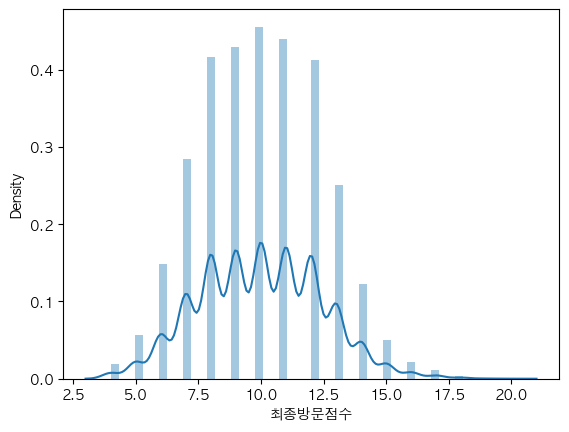

In [212]:
sns.distplot(pp_demo_map['최종방문점수'])

In [82]:
np.percentile(pp_pv['방문_변동지수'],10)

-0.21168258146571722

<AxesSubplot:>

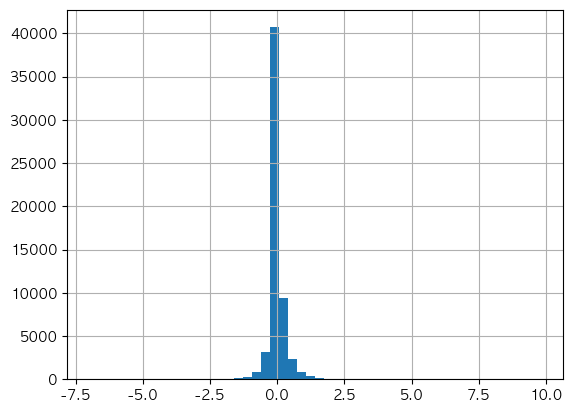

In [81]:
pp_pv['방문_변동지수'].hist(bins=50)

In [51]:
# 이탈고객의 정의

2418443.0